24


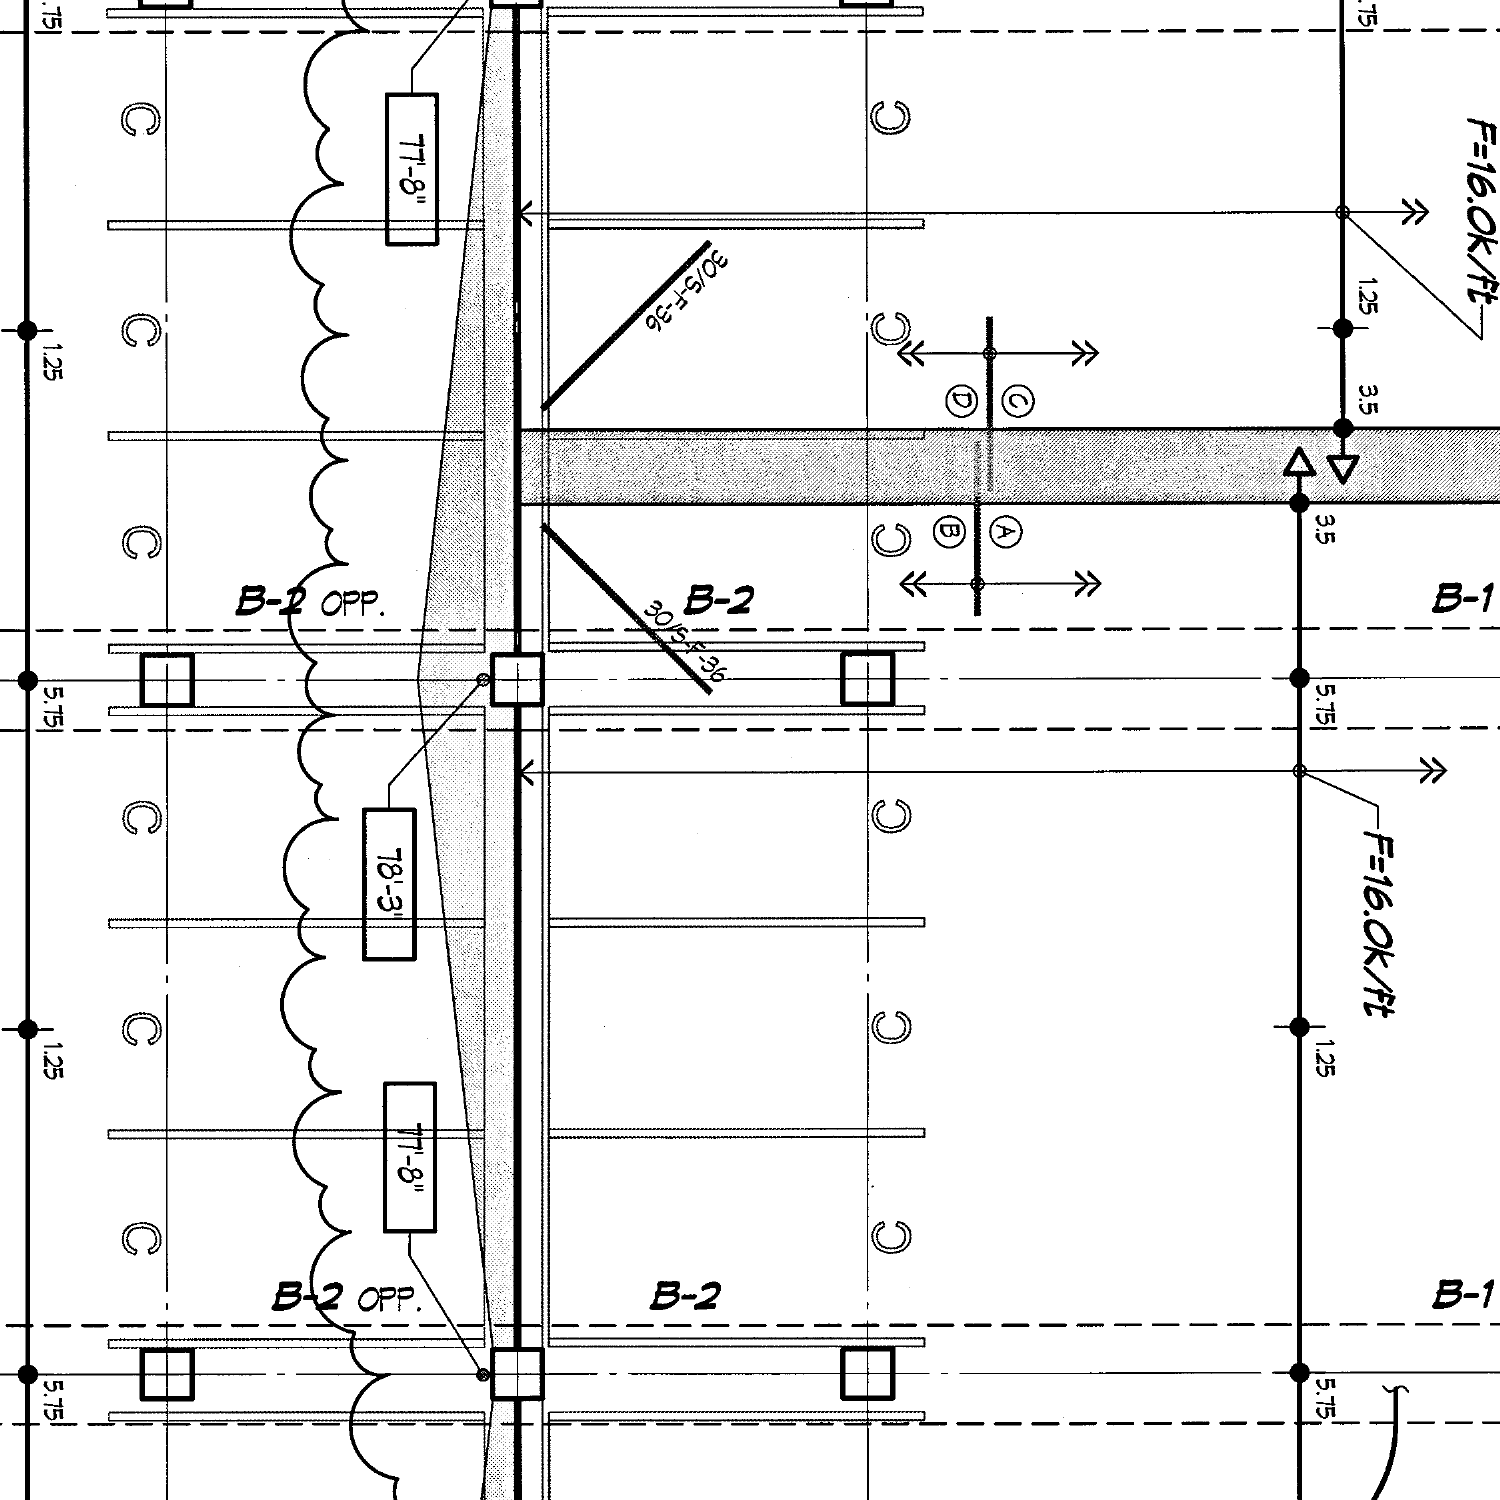

In [1]:
from ocr.line_detector import tile_image
import numpy as np
from PIL import Image
import cv2

img = cv2.imread("/home/sadid/PycharmProjects/sgs-drawing-analysis/data/miliennium_garage/original4.png")
img = cv2.rotate(img, cv2.ROTATE_90_CLOCKWISE)
height, width = img.shape[:2]
tiles = tile_image(img)
# tile = img[1000:2000, 2500:4000].copy()
tile = tiles[14][0].copy()
print(len(tiles))

Image.fromarray(tile)

(860, 735), (970, 735)


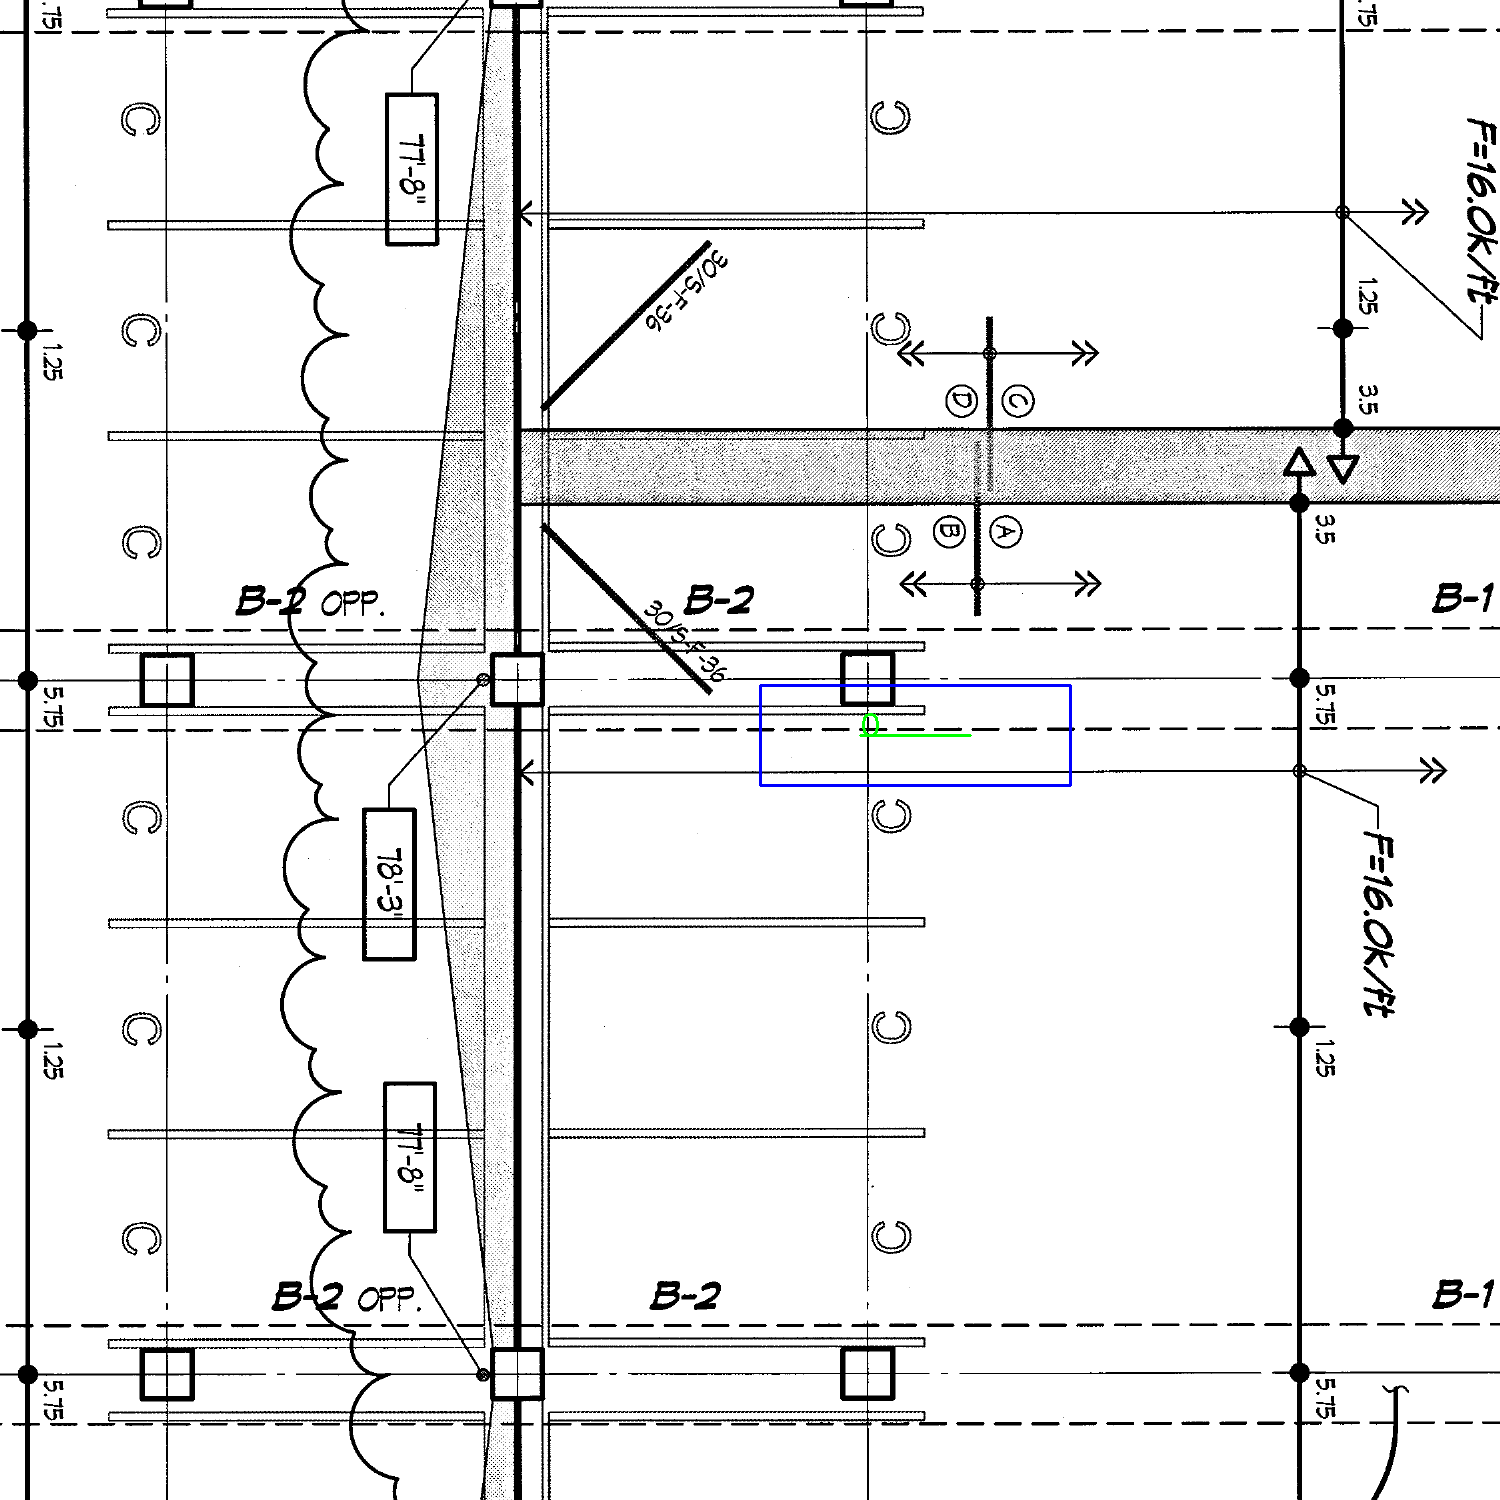

In [2]:
from ocr.line_detector import detect_lines_global
from ocr.post_tension_tendons import remove_noise

erode = remove_noise(tile)

raw_lines = detect_lines_global(erode)

vis = tile.copy()
img_crop = None
for i, (x1, y1, x2, y2) in enumerate(raw_lines):
    if i != 0:
        continue
    print(f"({x1}, {y1}), ({x2}, {y2})")
    cv2.line(vis, (x1, y1), (x2, y2), (0, 255, 0), 2)
    cv2.putText(vis, f"{i}", (x1, y1), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 0), 2)
    cv2.rectangle(vis, (x1-100, y1+50), (x2+100, y2-50), (0, 0, 255), 2)

    img_crop = tile[y1-20:y2+20, x1-100:x2+100]
    break

Image.fromarray(vis)

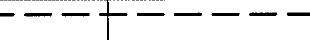

In [3]:
Image.fromarray(img_crop)

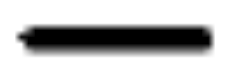

In [4]:
from ocr.line_detector import find_contours

template_vals = {
    "dash.png": ([0, 200], 'right')
}

template = list(template_vals.keys())[0]
ksize = (2, 2)

template_img = cv2.imread(f"/home/sadid/PycharmProjects/sgs-drawing-analysis/img_templates/{template}", cv2.IMREAD_COLOR)
Image.fromarray(template_img)

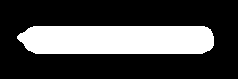

In [5]:
cnt_s = find_contours(template_img, ksize)
height, width = template_img.shape[:2]
mask = np.zeros((height, width), dtype=np.uint8)

for i, cnt in enumerate(cnt_s):
    cv2.drawContours(mask, [cnt], -1, 255, -1)

kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (5, 5))
mask = cv2.morphologyEx(mask, cv2.MORPH_CLOSE, kernel)

Image.fromarray(mask)

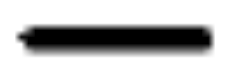

In [6]:
template_val = template_vals[template]
img_gray = cv2.cvtColor(img_crop, cv2.COLOR_BGR2GRAY)
template_gray = cv2.cvtColor(template_img, cv2.COLOR_BGR2GRAY)

Image.fromarray(template_gray)

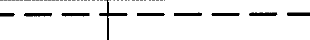

In [7]:
Image.fromarray(img_gray)

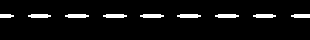

In [8]:

img_gray = remove_noise(img_gray)
Image.fromarray(img_gray)

0 40
40 80
80 120
120 160
160 200
200 240
240 280


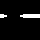

In [27]:
from ocr.line_detector import find_template_location

start=0.1
stop=3.0
num=20

crop_length = 40
vis = img_crop.copy()
image_vis = []
for i in range(int(img_gray.shape[1]/crop_length)):
    xe1, xe2 = (i*crop_length), (i+1)*crop_length
    print(xe1, xe2)
    image_vis.append(img_gray[0:40, xe1:xe2])
    score, bbox = find_template_location(img_gray[0:40, xe1:xe2], template_img, start=start, stop=stop, num=num)
    if score is not None:
        (x1, y1, x2, y2) = bbox
        cv2.rectangle(vis, (x1, y1), (x2, y2), (0, 255, 0), 2)
    else:
        print(score, bbox)

Image.fromarray(image_vis[3])